# pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.regularizers import l2

In [3]:
datadd = pd.read_csv("D:\\R&D\\TrafficLabelling\\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
dataps = pd.read_csv("D:\\R&D\\TrafficLabelling\\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
dataif = pd.read_csv("D:\\R&D\\TrafficLabelling\\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")

In [4]:
dataif[' Label'].unique()

array(['BENIGN', 'Infiltration'], dtype=object)

In [7]:
dataps[' Label'].unique()

array(['BENIGN', 'PortScan'], dtype=object)

In [8]:
datadd[' Label'].unique()

array(['BENIGN', 'DDoS'], dtype=object)

In [9]:
if (list(dataif.columns) == list(dataps.columns)):
    print(1)
if (list(datadd.columns) == list(dataps.columns)):
    print(1)

1
1


# GOING ON THE DDoS

In [10]:
datadd[:1]

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4000000.0,666666.6667,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.6667,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [11]:
if (datadd['Total Length of Fwd Packets'].iloc[0] / datadd[' Total Fwd Packets'].iloc[0]) == datadd[' Fwd Packet Length Mean'].iloc[0]:
    print(1)
else:
    print(0)


1


In [12]:
datadd[' SYN Flag Count'].max()

1

In [13]:
pd.set_option('display.max_columns', None)
datadd[25196:25197]

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
25196,172.16.0.1-192.168.10.50-15966-80-6,172.16.0.1,15966,192.168.10.50,80,6,7/7/2017 3:57,315474,3,4,26,11607,20,0,8.666667,10.263203,11595,0,2901.75,5795.50069,36874.67113,22.188833,52579.0,128202.352,314270,6,1054,527.0,656.195093,991,63,315411,105137.0,181115.3705,314270,6,0,0,0,0,72,92,9.5095,12.679333,0,11595,1454.125,4097.537534,16800000.0,0,0,0,1,0,0,0,0,1,1661.857143,8.666667,2901.75,72,0,0,0,0,0,0,3,26,4,11607,8192,229,2,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS


In [14]:
pd.set_option('display.max_columns', 20)
datadd.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [15]:
pd.set_option('display.max_rows', None)
import numpy as np

nan_locations = datadd.isna()
nan_positions = [(datadd.index[row], col) for row, col in zip(*np.where(datadd.isna()))]

print(nan_positions)


[(6796, 20), (14739, 20), (15047, 20), (209728, 20)]


In [16]:
p = 209730
datadd.at[p, 'Flow Bytes/s']

2737.070194

In [17]:
(datadd.at[p, 'Total Length of Fwd Packets'] + datadd.at[p, ' Total Length of Bwd Packets']) / (datadd.at[p, ' Flow Duration']/1000000)

2737.0701944460284

In [100]:
import pandas as pd
# List of row indices to update
rows_to_update = [6796, 14739, 15047]

# Compute Flow Bytes/s only for the selected rows
for row in rows_to_update:
    datadd.at[row,'Flow Bytes/s'] = 0

# Save the updated file
datadd.at[209728, 'Flow Bytes/s'] = 2737.070194
datadd.to_csv('D:\\R&D\\TrafficLabelling\\ddos_updated.csv', index=False)  # Use df.to_excel('updated_file.xlsx', index=False) for Excel

print("Flow Bytes/s updated successfully at specified locations!")


Flow Bytes/s updated successfully at specified locations!


In [20]:
dataref = pd.read_csv('D:\\R&D\\TrafficLabelling\\ddos_updated.csv')

In [21]:
pd.set_option('display.max_rows', None)
import numpy as np

nan_locations = dataref.isna()
nan_positions = [(dataref.index[row], col) for row, col in zip(*np.where(dataref.isna()))]

print(nan_positions)

[]


In [114]:
dataref.dtypes

Flow ID                          object
 Source IP                       object
 Source Port                      int64
 Destination IP                  object
 Destination Port                 int64
 Protocol                         int64
 Timestamp                       object
 Flow Duration                    int64
 Total Fwd Packets                int64
 Total Backward Packets           int64
Total Length of Fwd Packets       int64
 Total Length of Bwd Packets      int64
 Fwd Packet Length Max            int64
 Fwd Packet Length Min            int64
 Fwd Packet Length Mean         float64
 Fwd Packet Length Std          float64
Bwd Packet Length Max             int64
 Bwd Packet Length Min            int64
 Bwd Packet Length Mean         float64
 Bwd Packet Length Std          float64
Flow Bytes/s                    float64
 Flow Packets/s                 float64
 Flow IAT Mean                  float64
 Flow IAT Std                   float64
 Flow IAT Max                     int64


In [25]:
df = dataref
df = df.drop(['Flow ID', ' Source IP', ' Destination IP', ' Timestamp'], axis=1)

In [24]:
#df[np.isinf(df)]

TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Epoch 1/5


C:\CONDA\envs\myvenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5644/5644 ━━━━━━━━━━━━━━━━━━━━ 50s 8ms/step - accuracy: 0.9791 - loss: 0.2636 - val_accuracy: 0.9887 - val_loss: 0.0976
Epoch 2/5
5644/5644 ━━━━━━━━━━━━━━━━━━━━ 48s 9ms/step - accuracy: 0.9888 - loss: 0.0969 - val_accuracy: 0.9880 - val_loss: 0.0808
Epoch 3/5
5644/5644 ━━━━━━━━━━━━━━━━━━━━ 49s 9ms/step - accuracy: 0.9902 - loss: 0.0840 - val_accuracy: 0.9922 - val_loss: 0.0717
Epoch 4/5
5644/5644 ━━━━━━━━━━━━━━━━━━━━ 45s 8ms/step - accuracy: 0.9910 - loss: 0.0767 - val_accuracy: 0.9887 - val_loss: 0.0653
Epoch 5/5
5644/5644 ━━━━━━━━━━━━━━━━━━━━ 48s 9ms/step - accuracy: 0.9922 - loss: 0.0704 - val_accuracy: 0.9954 - val_loss: 0.0628


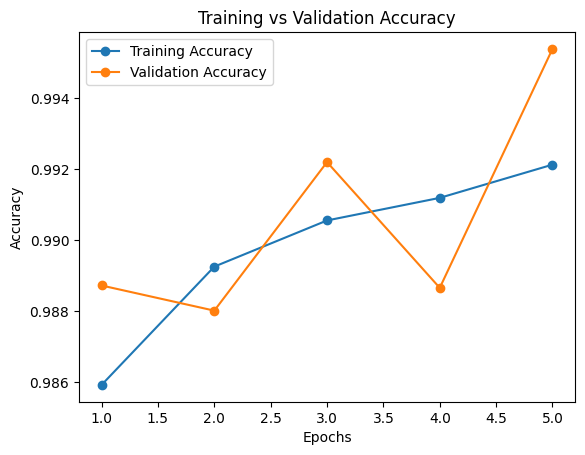

1411/1411 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9955 - loss: 0.0624
Test Accuracy: 0.9954
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step


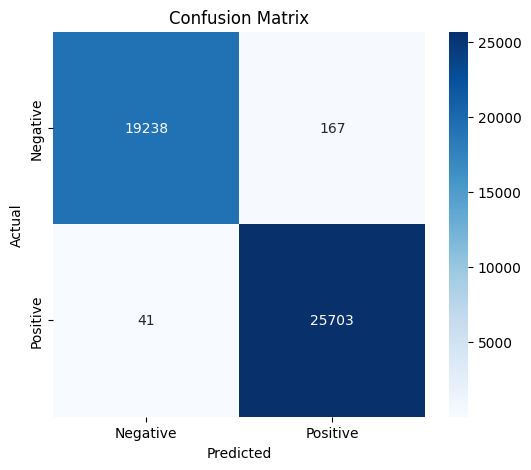

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19405
           1       0.99      1.00      1.00     25744

    accuracy                           1.00     45149
   macro avg       1.00      0.99      1.00     45149
weighted avg       1.00      1.00      1.00     45149



In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
# Step 1: Load dataset
# Assuming df is your dataset
# Replace with your actual dataset path
np.random.seed(42)

# Step 2: Preprocess Data
# Encode labels
label_encoder = LabelEncoder()
df[' Label'] = label_encoder.fit_transform(df[' Label'])  # Assuming 'Label' is the target column

# Separate features and labels
X = df.drop(columns=[' Label'])  # Feature columns
y = df[' Label']  # Target column

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN (assuming features can be treated as a 1D sequence)
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)  # Shape: (samples, features, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Step 3: Define CNN Model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),  # Added extra Conv1D layer with L2
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),  # Dropout to reduce overfitting
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Step 5: Plot Accuracy to Check Overfitting
epochs = range(1, len(history.history['accuracy']) + 1)

plt.plot(epochs, history.history['accuracy'], label="Training Accuracy", marker="o")
plt.plot(epochs, history.history['val_accuracy'], label="Validation Accuracy", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()
# Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
# Step 7: Predict on Test Data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Step 8: Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Step 9: Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
# Step 10: Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [34]:
df[' Label'].unique()

array(['BENIGN', 'DDoS'], dtype=object)

In [9]:
df = pd.read_csv('D:\\R&D\\TrafficLabelling\\updated\\ddos_updated.csv')
df = df.drop(['Flow ID', ' Source IP', ' Destination IP', ' Timestamp'], axis=1)

C:\CONDA\envs\myvenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 58s 11ms/step - accuracy: 0.9806 - loss: 0.2721 - val_accuracy: 0.9878 - val_loss: 0.0959
Epoch 2/5
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 57s 11ms/step - accuracy: 0.9886 - loss: 0.1008 - val_accuracy: 0.9962 - val_loss: 0.0843
Epoch 3/5
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 57s 12ms/step - accuracy: 0.9908 - loss: 0.0851 - val_accuracy: 0.9984 - val_loss: 0.0744
Epoch 4/5
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 55s 11ms/step - accuracy: 0.9923 - loss: 0.0764 - val_accuracy: 0.9900 - val_loss: 0.0665
Epoch 5/5
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 54s 11ms/step - accuracy: 0.9934 - loss: 0.0704 - val_accuracy: 0.9967 - val_loss: 0.0627


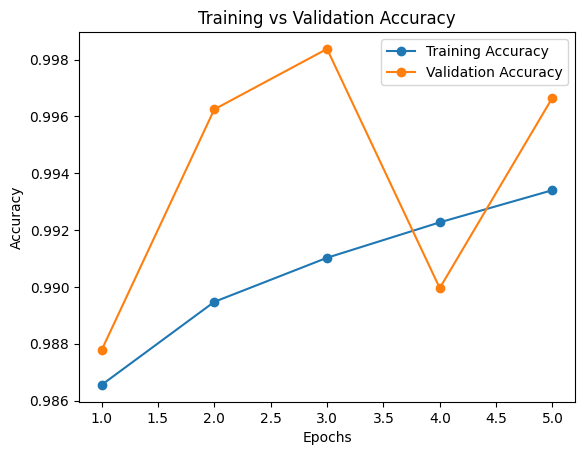

1059/1059 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9969 - loss: 0.0620
Test Accuracy: 0.9968
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step


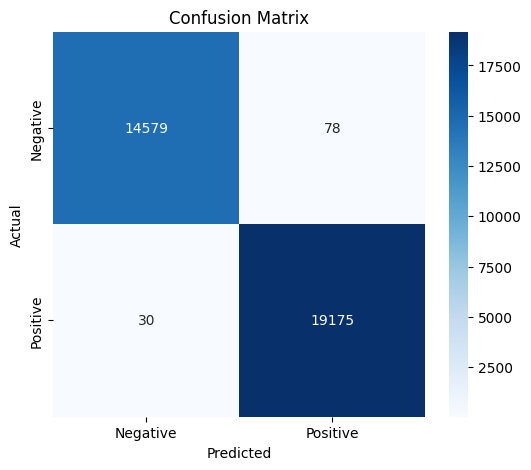

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14657
           1       1.00      1.00      1.00     19205

    accuracy                           1.00     33862
   macro avg       1.00      1.00      1.00     33862
weighted avg       1.00      1.00      1.00     33862



In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Set seed for reproducibility
np.random.seed(42)

# Step 1: Load dataset (Assuming df is your dataset)
# Replace with your actual dataset
# df = pd.read_csv("your_dataset.csv")

# Step 2: Preprocess Data
# Encode labels
label_encoder = LabelEncoder()
df[' Label'] = label_encoder.fit_transform(df[' Label'])  # Assuming 'Label' is the target column

# Separate features and labels
X = df.drop(columns=[' Label'])  # Feature columns
y = df[' Label']  # Target column

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN (assuming features can be treated as a 1D sequence)
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)  # Shape: (samples, features, 1)

# Split data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 3: Define CNN Model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),  # Extra Conv1D layer with L2
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),  # Dropout to reduce overfitting
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model with Validation Data
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Step 5: Plot Training vs Validation Accuracy
epochs = range(1, len(history.history['accuracy']) + 1)

plt.plot(epochs, history.history['accuracy'], label="Training Accuracy", marker="o")
plt.plot(epochs, history.history['val_accuracy'], label="Validation Accuracy", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# Step 6: Evaluate the Model on Test Data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Step 7: Predict on Test Data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Step 8: Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Step 9: Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 10: Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


C:\CONDA\envs\myvenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 54s 10ms/step - accuracy: 0.9809 - loss: 0.2924 - val_accuracy: 0.9895 - val_loss: 0.1037
Epoch 2/10
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 52s 10ms/step - accuracy: 0.9881 - loss: 0.1037 - val_accuracy: 0.9885 - val_loss: 0.0839
Epoch 3/10
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 51s 10ms/step - accuracy: 0.9894 - loss: 0.0876 - val_accuracy: 0.9900 - val_loss: 0.0755
Epoch 4/10
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 51s 10ms/step - accuracy: 0.9896 - loss: 0.0816 - val_accuracy: 0.9894 - val_loss: 0.0698
Epoch 5/10
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 51s 10ms/step - accuracy: 0.9906 - loss: 0.0760 - val_accuracy: 0.9898 - val_loss: 0.0671
Epoch 6/10
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 52s 10ms/step - accuracy: 0.9912 - loss: 0.0723 - val_accuracy: 0.9950 - val_loss: 0.0633
Epoch 7/10
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 51s 10ms/step - accuracy: 0.9926 - loss: 0.0669 - val_accuracy: 0.9976 - val_loss: 0.0616
Epoch 8/10
4939/4939 ━━━━━━━━━━━━━━━━━━━━ 51s 10ms/step - accuracy: 0.9937 -

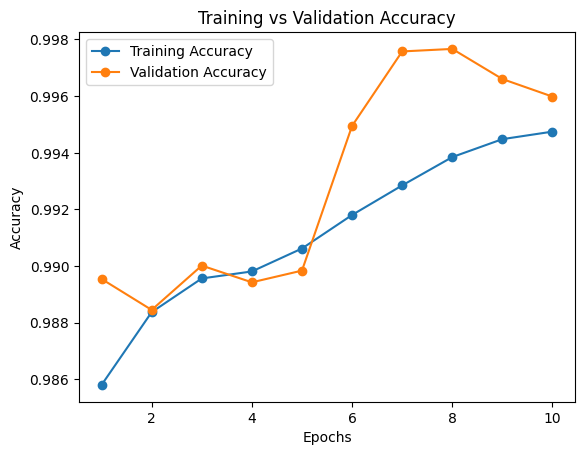

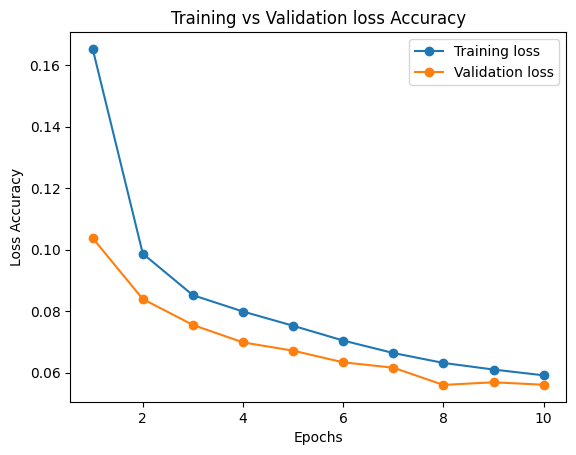

1059/1059 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9961 - loss: 0.0562
Test Accuracy: 0.9960
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step


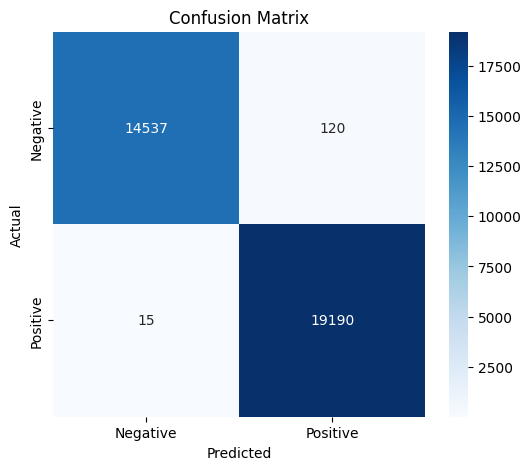

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14657
           1       0.99      1.00      1.00     19205

    accuracy                           1.00     33862
   macro avg       1.00      1.00      1.00     33862
weighted avg       1.00      1.00      1.00     33862



In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Set seed for reproducibility
np.random.seed(42)

# Step 1: Load dataset (Assuming df is your dataset)
# Replace with your actual dataset
# df = pd.read_csv("your_dataset.csv")

# Step 2: Preprocess Data
# Encode labels
label_encoder = LabelEncoder()
df[' Label'] = label_encoder.fit_transform(df[' Label'])  # Assuming 'Label' is the target column

# Separate features and labels
X = df.drop(columns=[' Label'])  # Feature columns
y = df[' Label']  # Target column

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN (assuming features can be treated as a 1D sequence)
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)  # Shape: (samples, features, 1)

# Split data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 3: Define CNN Model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),  # Extra Conv1D layer with L2
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),  # Dropout to reduce overfitting
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model with Validation Data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Step 5: Plot Training vs Validation Accuracy
epochs = range(1, len(history.history['accuracy']) + 1)

plt.plot(epochs, history.history['accuracy'], label="Training Accuracy", marker="o")
plt.plot(epochs, history.history['val_accuracy'], label="Validation Accuracy", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


plt.plot(epochs, history.history['loss'], label="Training loss", marker="o")
plt.plot(epochs, history.history['val_loss'], label="Validation loss", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss Accuracy")
plt.legend()
plt.title("Training vs Validation loss Accuracy")
plt.show()
# Step 6: Evaluate the Model on Test Data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Step 7: Predict on Test Data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Step 8: Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Step 9: Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 10: Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [159]:
print(f"Training set size: {len(y_train)}")
print(f"Test set size: {len(y_test)}")


Training set size: 180596
Test set size: 45149


In [162]:
print(df[' Label'].value_counts())

 Label
1    128027
0     97718
Name: count, dtype: int64


# GOING INTO the PORT SCAN

In [166]:
pd.set_option("display.max_columns", None)
dataps[:1]

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.12,35396,192.168.10.50,22,6,7/7/2017 1:00,1266342,41,44,2664,6954,456,0,64.97561,109.864573,976,0,158.045455,312.67525,7595.10464,67.122468,15075.5,104051.3997,948537.0,0.0,1266342.0,31658.55,159355.2595,996324.0,2.0,317671.0,7387.697674,19636.44809,104616.0,1.0,0,0,0,0,1328,1424,32.37672,34.745748,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.97561,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [198]:
dataps[' Label'].unique()

array(['BENIGN', 'PortScan'], dtype=object)

In [199]:
pd.set_option("display.max_columns", 20)

In [200]:
if dataps.columns.tolist() == datadd.columns.tolist() :
    print(1)

1


In [201]:
pd.set_option('display.max_rows', None)
nan_locations = dataps.isna()
nan_positions = [(dataps.index[row], col) for row, col in zip(*np.where(dataps.isna()))]

print(nan_positions)


[]


In [202]:
rows_update = [12824, 12827, 14192,40707,52456,56603,76549,76773,225846,237968,238016,239586,259076,259682,253214]

for row in rows_update:
    dataps.at[row, 'Flow Bytes/s'] = 0
dataps.to_csv('D:\\R&D\\TrafficLabelling\\portscan_updated.csv', index=False)  # Use df.to_excel('updated_file.xlsx', index=False) for Excel

print("Flow Bytes/s updated successfully at specified locations!")

Flow Bytes/s updated successfully at specified locations!


In [203]:
pd.set_option('display.max_rows', None)
import numpy as np

nan_locations = dataps.isna()
nan_positions = [(dataps.index[row], col) for row, col in zip(*np.where(dataps.isna()))]

print(nan_positions)


[]


In [53]:
dd = pd.read_csv('D:\\R&D\\TrafficLabelling\\ddos_updated.csv')
ps = pd.read_csv('D:\\R&D\\TrafficLabelling\\portscan_updated.csv')

In [54]:
df = pd.concat([dd,ps])
df.to_csv('D:\\R&D\\TrafficLabelling\\combineddps.csv')

In [55]:
df = pd.read_csv('D:\\R&D\\TrafficLabelling\\combineddps.csv')
df[:1]

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,07-07-2017 03:30,3,2,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [56]:
df[' Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan'], dtype=object)

In [57]:
df = df.drop(['Flow ID', ' Source IP', ' Destination IP', ' Timestamp'], axis=1)

C:\CONDA\envs\myvenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
11205/11205 ━━━━━━━━━━━━━━━━━━━━ 125s 11ms/step - accuracy: 0.9748 - loss: 0.2786 - val_accuracy: 0.9921 - val_loss: 0.1142
Epoch 2/5
11205/11205 ━━━━━━━━━━━━━━━━━━━━ 122s 11ms/step - accuracy: 0.9913 - loss: 0.1096 - val_accuracy: 0.9944 - val_loss: 0.0844
Epoch 3/5
11205/11205 ━━━━━━━━━━━━━━━━━━━━ 124s 11ms/step - accuracy: 0.9932 - loss: 0.0899 - val_accuracy: 0.9953 - val_loss: 0.0730
Epoch 4/5
11205/11205 ━━━━━━━━━━━━━━━━━━━━ 176s 16ms/step - accuracy: 0.9941 - loss: 0.0801 - val_accuracy: 0.9946 - val_loss: 0.0727
Epoch 5/5
11205/11205 ━━━━━━━━━━━━━━━━━━━━ 116s 10ms/step - accuracy: 0.9946 - loss: 0.0746 - val_accuracy: 0.9972 - val_loss: 0.0624


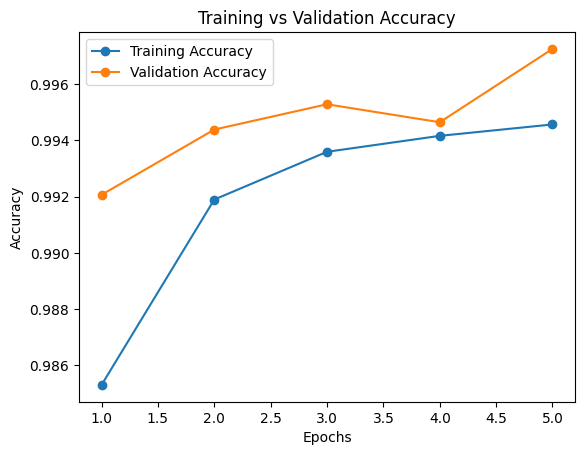

2401/2401 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9972 - loss: 0.0612
Test Accuracy: 0.9975
2401/2401 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step


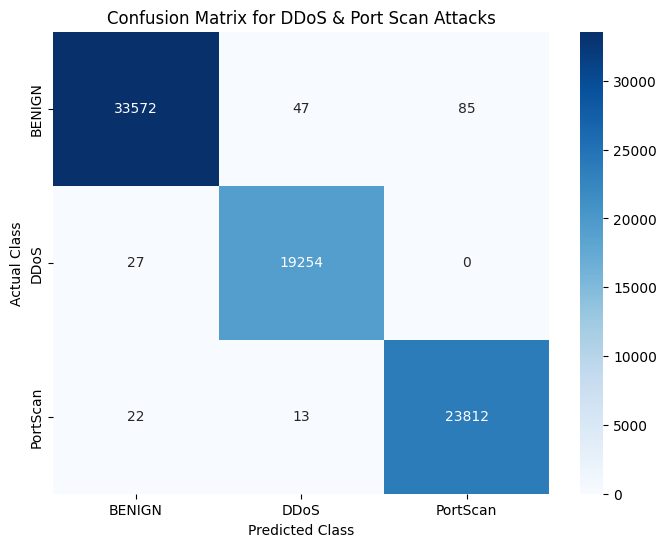

Classification Report:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     33704
        DDoS       1.00      1.00      1.00     19281
    PortScan       1.00      1.00      1.00     23847

    accuracy                           1.00     76832
   macro avg       1.00      1.00      1.00     76832
weighted avg       1.00      1.00      1.00     76832



In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical

# Set seed for reproducibility
np.random.seed(42)

# Step 1: Load dataset (Assuming df is your dataset)
# Replace with your actual dataset
# df = pd.read_csv("your_combined_dataset.csv")

# Step 2: Preprocess Data
# Encode labels (Multi-Class)
label_encoder = LabelEncoder()
df[' Label'] = label_encoder.fit_transform(df[' Label'])  # Converts classes to numerical labels

# Separate features and labels
X = df.drop(columns=[' Label'])  # Feature columns
y = df[' Label']  # Target column

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert labels to categorical (One-Hot Encoding)
num_classes = len(label_encoder.classes_)  # Number of unique attack types
y_categorical = to_categorical(y, num_classes)  # Convert to one-hot

# Reshape data for CNN
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)  # Shape: (samples, features, 1)

# Split data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_categorical, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 3: Define CNN Model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),  # Extra Conv1D layer with L2
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),  # Dropout to reduce overfitting
    Dense(num_classes, activation='softmax')  # Multi-class classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model with Validation Data
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Step 5: Plot Training vs Validation Accuracy
epochs = range(1, len(history.history['accuracy']) + 1)

plt.plot(epochs, history.history['accuracy'], label="Training Accuracy", marker="o")
plt.plot(epochs, history.history['val_accuracy'], label="Validation Accuracy", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# Step 6: Evaluate the Model on Test Data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Step 7: Predict on Test Data
y_pred_prob = model.predict(X_test)  # Softmax probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded y_test back to class labels

# Step 8: Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Step 9: Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix for DDoS & Port Scan Attacks")
plt.show()

# Step 10: Print Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# INfiltration starts from here

In [6]:
dataif.isna()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288597,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
288598,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
288599,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
288600,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
import numpy as np

nan_locations = dataif.isna()
nan_positions = [(dataif.index[row], col) for row, col in zip(*np.where(dataif.isna()))]

print(nan_positions)

[(18639, 20), (54760, 20), (74624, 20), (91230, 20), (93282, 20), (99102, 20), (104251, 20), (104574, 20), (105056, 20), (107998, 20), (115661, 20), (118200, 20), (124172, 20), (195126, 20), (197610, 20), (220268, 20), (236709, 20), (246078, 20)]


In [12]:
dataif.columns[20]

'Flow Bytes/s'

In [13]:
import pandas as pd
# List of row indices to update
rows_to_update = [18639, 54760, 74624, 91230, 93282, 99102, 104251, 104574, 105056, 107998, 115661, 118200, 124172, 195126, 197610, 220268, 236709, 246078]

# Compute Flow Bytes/s only for the selected rows
for row in rows_to_update:
    datadd.at[row,'Flow Bytes/s'] = 0

# Save the updated file
dataif.to_csv('D:\\R&D\\TrafficLabelling\\infiltration_updated.csv', index=False)  # Use df.to_excel('updated_file.xlsx', index=False) for Excel

print("Flow Bytes/s updated successfully at specified locations!")


Flow Bytes/s updated successfully at specified locations!


In [14]:
datamon = pd.read_csv('D:\\R&D\\TrafficLabelling\\Monday-WorkingHours.pcap_ISCX.csv')
datamon[' Label'].unique()

array(['BENIGN'], dtype=object)

In [4]:
datatue = pd.read_csv('D:\\R&D\\TrafficLabelling\\Tuesday-WorkingHours.pcap_ISCX.csv')
datatue[' Label'].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator'], dtype=object)

In [5]:
datawed = pd.read_csv('D:\\R&D\\TrafficLabelling\\Wednesday-workingHours.pcap_ISCX.csv')
datawed[' Label'].unique()

array(['BENIGN', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk',
       'DoS GoldenEye', 'Heartbleed'], dtype=object)

In [6]:
#datathr = pd.read_csv('D:\\R&D\\TrafficLabelling\\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
#datawed[' Label'].unique()

In [7]:
datafri = pd.read_csv('D:\\R&D\\TrafficLabelling\\Friday-WorkingHours-Morning.pcap_ISCX.csv')
datafri[' Label'].unique()

array(['BENIGN', 'Bot'], dtype=object)

In [15]:
datacom = pd.read_csv('D:\\R&D\\TrafficLabelling\\updated\\combineddps.csv')

In [16]:
datacom[' Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan'], dtype=object)

In [17]:
datainf = pd.read_csv('D:\\R&D\\TrafficLabelling\\updated\\infiltration_updated.csv')

In [18]:
datainf[' Label'].unique()

array(['BENIGN', 'Infiltration'], dtype=object)

In [19]:
combi = pd.concat([datacom, datainf], ignore_index= True);

In [20]:
combi.to_csv(r'D:\\R&D\\TrafficLabelling\\updated\\combineddpsin.csv')

In [22]:
combi[' Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Infiltration'], dtype=object)